<a href="https://colab.research.google.com/github/shfarhaan/EquiJob/blob/main/EDAForEquiJob_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Making required libraries download

# Importing the libraires

In [ ]:
import pandas as pd
import spacy
import nltk
import numpy as np
pd.set_option('display.max_columns', 20)
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
import string
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import re

%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Downloading required nltk packages

# Downloading dataset

In [ ]:
df = pd.read_csv('/content/All_JDs.csv')

<ipython-input-3-0596935f3f1b>:1: DtypeWarning: Columns (3,4,5,7,8,11,12,14,15,16,17,18,20,21,22,23,24,25,26,27,28,29,30,31,32,33,35,36,37,39,51,52,53,54,55,57,58) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/All_JDs.csv')


In [ ]:
df.head()

,Unnamed: 0.1,web-scraper-order,web-scraper-start-url,Title,Tile Link,Tile Link-href,Location,JobRole,Experience,Job_description,...,Industries,Person_hiring,job page,job page-href,jib title,location,company name,Unnamed: 0,url,company_name
0,0,1696148892-1,https://cord.co/search,Account Executive - SMB,"DeputyAccount Executive - SMBLondon, UK · Ju...",https://cord.co/search/u/deputy/jobs/30335-acc...,"London, UK",Account Executive,Junior,"As an SMB Account Executive, you will identify...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1696148900-2,https://cord.co/search,Rails Full Stack Engineer,jumpAgradeRails Full Stack EngineerRemote only...,https://cord.co/search/u/jumpagrade/jobs/30340...,Remote only,Full Stack,"Mid, Senior",We’re looking for a key new member to join our...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1696148905-3,https://cord.co/search,Data Analyst and Software Developer,SmartVizData Analyst and Software DeveloperLon...,https://cord.co/search/u/smartviz/jobs/30347-d...,"London, UK",Data Analyst,"Mid, Senior",We are looking for a Data Analyst and Software...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1696148928-4,https://cord.co/search,Senior BI Developer,"Creative VirtualSenior BI DeveloperLondon, UK ...",https://cord.co/search/u/creative-virtual/jobs...,"London, UK",BI Developer,Senior,Creative Virtual are therefore seeking an ener...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1696148936-5,https://cord.co/search,Full Stack Developer,"Creative VirtualFull Stack DeveloperLondon, UK...",https://cord.co/search/u/creative-virtual/jobs...,"London, UK",Full Stack,"Mid, Senior",Essential Skills:Minimum of bachelor’s degree ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Converting relevant columns to lower case, as NLP models are case sensitive.

In [ ]:
df1_lower = df.copy()
df1_lower['Job_description'] = df['Job_description'].str.lower()
df1_lower['Job_Title'] = df['Job_Title'].str.lower()
df1_lower['Search_Keyword'] = df['Search_Keyword'].str.lower()
df1_lower.head()

,Unnamed: 0.1,web-scraper-order,web-scraper-start-url,Title,Tile Link,Tile Link-href,Location,JobRole,Experience,Job_description,...,Industries,Person_hiring,job page,job page-href,jib title,location,company name,Unnamed: 0,url,company_name
0,0,1696148892-1,https://cord.co/search,Account Executive - SMB,"DeputyAccount Executive - SMBLondon, UK · Ju...",https://cord.co/search/u/deputy/jobs/30335-acc...,"London, UK",Account Executive,Junior,"as an smb account executive, you will identify...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1696148900-2,https://cord.co/search,Rails Full Stack Engineer,jumpAgradeRails Full Stack EngineerRemote only...,https://cord.co/search/u/jumpagrade/jobs/30340...,Remote only,Full Stack,"Mid, Senior",we’re looking for a key new member to join our...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1696148905-3,https://cord.co/search,Data Analyst and Software Developer,SmartVizData Analyst and Software DeveloperLon...,https://cord.co/search/u/smartviz/jobs/30347-d...,"London, UK",Data Analyst,"Mid, Senior",we are looking for a data analyst and software...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1696148928-4,https://cord.co/search,Senior BI Developer,"Creative VirtualSenior BI DeveloperLondon, UK ...",https://cord.co/search/u/creative-virtual/jobs...,"London, UK",BI Developer,Senior,creative virtual are therefore seeking an ener...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1696148936-5,https://cord.co/search,Full Stack Developer,"Creative VirtualFull Stack DeveloperLondon, UK...",https://cord.co/search/u/creative-virtual/jobs...,"London, UK",Full Stack,"Mid, Senior",essential skills:minimum of bachelor’s degree ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Duplicate Handling

In [ ]:
duplicates_per_column = df1_lower.apply(lambda x: x.duplicated().sum())
print(duplicates_per_column)

Unnamed: 0.1             20240
web-scraper-order        18573
web-scraper-start-url    25258
Title                    24743
Tile Link                24386
Tile Link-href           24375
Location                 18340
JobRole                  25306
Experience               25477
Job_description           6689
Job_title                23213
job                      23080
job-href                 22622
title                    19645
country                  25491
city                     25483
company                  24820
Skills                   25328
Details                  25351
ID                       24873
Job_Title                18534
Job_Title_URL            24876
Company_name             25059
Country                  25407
Search_Keyword           25474
Search_Location          25484
Job_Detail_Link          16876
Company_Name             20928
Salary                   22664
Job_rating               24678
Job_review_count         25009
Job_Type                 25462
Email   

Removing duplicates from Job Description column

In [ ]:
df1_lower = df1_lower.drop_duplicates( subset =['Job_description'], keep ='first')

Updating dataframe with relevant columns only

In [ ]:
df1_lower = df1_lower[['Title','Location','JobRole',	'Experience','Job_description']].copy()
df1_lower.head()

,Title,Location,JobRole,Experience,Job_description
0,Account Executive - SMB,"London, UK",Account Executive,Junior,"as an smb account executive, you will identify..."
1,Rails Full Stack Engineer,Remote only,Full Stack,"Mid, Senior",we’re looking for a key new member to join our...
2,Data Analyst and Software Developer,"London, UK",Data Analyst,"Mid, Senior",we are looking for a data analyst and software...
3,Senior BI Developer,"London, UK",BI Developer,Senior,creative virtual are therefore seeking an ener...
4,Full Stack Developer,"London, UK",Full Stack,"Mid, Senior",essential skills:minimum of bachelor’s degree ...


# Removing HTML tags if any exists

In [ ]:
tags_list = ['<p>' ,'</p>' , '<p*>',
             '<ul>','</ul>',
             '<li>','</li>',
             '<br>',
             '<strong>','</strong>',
             '<span*>','</span>',
             '<a href*>','</a>',
             '<em>','</em>']

for tag in tags_list:
  df1_lower['Job_description'].replace(to_replace=tag, value='', regex=True, inplace=True)

In [ ]:
def preprocess(q):

    q=str(q).lower().strip()

    q = q.replace("$","dollar")
    q = q.replace("₹","rupee")
    q = q.replace("%","percent")
    q = q.replace("@","at")
    q = q.replace("€","euro")

    q = q.replace('[math]', '')

    q = q.replace(', 000,000,000', 'b ')
    q = q.replace(', 000,000', 'm ')
    q = q.replace(', 000', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)


    #decontracting words
    contractions = {
    "ain't": "am not",
    "can't": "cannot",
    "can't've": "cannot have",
    "cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he had / he would",
    "he'd've": "he would have",
    "he'll": "he shall / he will",
    "he'll've": "he shall have / he will have",
    "he's": "he has / he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how has / how is / how does",
    "I'd": "I had / I would",
    "I'd've": "I would have",
    "I'll": "I shall / I will",
    "I'll've": "I shall have / I will have",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it had / it would",
    "it'd've": "it would have",
    "it'll": "it shall / it will",
    "it'll've": "it shall have / it will have",
    "it's": "it has / it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she had / she would",
    "she'd've": "she would have",
    "she'll": "she shall / she will",
    "she'll've": "she shall have / she will have",
    "she's": "she has / she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as / so is",
    "that'd": "that would / that had",
    "that'd've": "that would have",
    "that's": "that has / that is",
    "there'd": "there had / there would",
    "there'd've": "there would have",
    "there's": "there has / there is",
    "they'd": "they had / they would",
    "they'd've": "they would have",
    "they'll": "they shall / they will",
    "they'll've": "they shall have / they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had / we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what shall / what will",
    "what'll've": "what shall have / what will have",
    "what're": "what are",
    "what's": "what has / what is",
    "what've": "what have",
    "when's": "when has / when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where has / where is",
    "where've": "where have",
    "who'll": "who shall / who will",
    "who'll've": "who shall have / who will have",
    "who's": "who has / who is",
    "who've": "who have",
    "why's": "why has / why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you had / you would",
    "you'd've": "you would have",
    "you'll": "you shall / you will",
    "you'll've": "you shall have / you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]
        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ill", " will")

    #removing html tags
    q = BeautifulSoup(q)
    q = q.get_text()

    #removing punctuations
    pattern = re.compile('\W')

    q=re.sub(pattern , ' ', q).strip()

    return q

In [ ]:
# preprocess
df1_lower['Job_description'] = df1_lower['Job_description'].apply(preprocess)
# remove extra spaces
df1_lower['Job_description'] = df1_lower['Job_description'].str.strip().str.replace(r'\s+', ' ', regex=True)

<ipython-input-10-0c6e9e2b96cc>:155: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  q = BeautifulSoup(q)


In [ ]:
from nltk.corpus import stopwords
stops=set(stopwords.words('english'))
import string
punctuations=list(string.punctuation)
stops.update(punctuations)
stops

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'need

In [ ]:
# remove he, his, her etc from stop words as these words are important for labelling the data(gender bias column)
stops = {'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'here',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 're',
 's',
 'same',
 'shan',
 "shan't",
 'she',
 "she's",
 'should',
 "should've",
 'shouldn',
 "shouldn't",
 'so',
 'some',
 'such',
 't',
 'than',
 'that',
 "that'll",
 'the',
 'their',
 'theirs',
 'them',
 'themselves',
 'then',
 'there',
 'these',
 'they',
 'this',
 'those',
 'through',
 'to',
 'too',
 'under',
 'until',
 'up',
 've',
 'very',
 'was',
 'wasn',
 "wasn't",
 'we',
 'were',
 'weren',
 "weren't",
 'what',
 'when',
 'where',
 'which',
 'while',
 'who',
 'whom',
 'why',
 'will',
 'with',
 'won',
 "won't",
 'wouldn',
 "wouldn't",
 'y',
 'you',
 "you'd",
 "you'll",
 "you're",
 "you've",
 'your',
 'yours',
 'yourself',
 'yourselves',
 '{',
 '|',
 '}',
 '~'}

In [ ]:
def clean(q):

    words = str(q).split()

    # Initialize an empty list to store cleaned words
    cleaned_words = []

    # Iterate through the words and check if they are in the list of stop words
    for word in words:
        if word not in stops:
            cleaned_words.append(word)

    # Join the cleaned words into a single string with spaces
    cleaned_text = ' '.join(cleaned_words)

    return cleaned_text

In [ ]:
df1_lower['Job_description'] = df1_lower['Job_description'].apply(clean)

# Lemmatization and Removal of stopwords

In [ ]:
from nltk.tokenize import wordpunct_tokenize
def tokenize_text(text):
    return wordpunct_tokenize(text)

# Apply the tokenize_text function to create a new 'Tokenized_Description' column
df1_lower['Tokenized_Description'] = df1_lower['Job_description'].apply(tokenize_text)


In [ ]:
import nltk
from nltk import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')
def lemmatize_text(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text])

# Apply the lemmatize_text function to create a new 'Lemmatized_Description' column
df1_lower['Lemmatized_Description'] = df1_lower['Tokenized_Description'].apply(lemmatize_text)
df1_lower['Lemmatized_Description_real'] = df1_lower['Lemmatized_Description'].apply(tokenize_text)


[nltk_data] Downloading package wordnet to /root/nltk_data...


# Finding the count of masculing ,feminine and gender neutral words

In [ ]:
masculine_words = ['Ambition', 'driven', 'lead', 'persist', 'principle', 'decision', 'superior', 'individual', 'assertive', 'strong', 'hierarchical', 'rigid', 'Silicon Valley', 'stock options', 'takes risk', 'workforce', 'autonomous', 'ping pong', 'pool table', 'must', 'competitive', 'he', ' his', 'himself','confident', 'active', 'aggressive', 'ambitious', 'fearless', 'headstrong', 'defensive', 'independent', 'dominant', 'outspoken',]
feminine_words =  ['Thoughtful', 'creative', 'adaptable', 'choose', 'curious', 'excellent', 'flexible', 'multitasking', 'health', 'imaginative', 'intuitive', 'leans in', 'plans for the future', 'resilient', 'self-aware', 'socially responsible', 'trustworthy', 'shup-to-date', 'wellness program', 'nurture', 'teach', 'dependable', 'community', 'serving', 'loyal', 'enthusiasm', 'interpersonal', 'connect', 'commit', 'she', 'agree', 'empathy','sensitive', 'affectionate', 'feel', 'support', 'collaborate', 'honest', 'trust', 'understand', 'comapssion', 'share','polite', 'kind', 'caring', 'her', 'hers', 'herself']
racial_words = ['native English speaker', 'professionally groomed hair', 'native', 'culture fit', 'non-white', 'Clean-shaven', 'neat hairstyle', 'Master', 'Slave', 'a cakewalk', 'brownbag session', 'spirit animal', 'digital native', 'servant leadership', 'tribe', 'Oriental', 'spic', 'English Fluency', 'Level Native', 'Illegals','Eskimo', 'Latino', 'Latina', 'Migrant', 'blacklist', 'whitelist']

In [ ]:
masculine = [item.lower() for item in masculine_words]
feminine = [item.lower() for item in feminine_words]
racial = [item.lower() for item in racial_words]
masculine.sort()
feminine.sort()
racial.sort()

In [ ]:
def bias(text):
    male_count = 0
    female_count = 0
    racial_count = 0


    for word in text.split():
        if word in masculine:
            male_count += 1
        if word in feminine:
            female_count += 1
        if word in racial:
            racial_count +=1

    return pd.Series({'male_bias': male_count, 'female_bias': female_count, 'racial_bias' : racial_count})

# Apply the bias function to each row and update 'male_bias' and 'female_bias' columns
df1_lower[['male_bias', 'female_bias', 'racial_bias']] = df1_lower['Lemmatized_Description'].apply(bias)


In [ ]:
df1_lower.head()

,Title,Location,JobRole,Experience,Job_description,Tokenized_Description,Lemmatized_Description,Lemmatized_Description_real,male_bias,female_bias,racial_bias
0,Account Executive - SMB,"London, UK",Account Executive,Junior,smb account executive identify qualify new opp...,"[smb, account, executive, identify, qualify, n...",smb account executive identify qualify new opp...,"[smb, account, executive, identify, qualify, n...",6,2,0
1,Rails Full Stack Engineer,Remote only,Full Stack,"Mid, Senior",looking key new member join small talented pro...,"[looking, key, new, member, join, small, talen...",looking key new member join small talented pro...,"[looking, key, new, member, join, small, talen...",6,2,0
2,Data Analyst and Software Developer,"London, UK",Data Analyst,"Mid, Senior",looking data analyst software developer work r...,"[looking, data, analyst, software, developer, ...",looking data analyst software developer work r...,"[looking, data, analyst, software, developer, ...",0,1,1
3,Senior BI Developer,"London, UK",BI Developer,Senior,creative virtual therefore seeking energetic e...,"[creative, virtual, therefore, seeking, energe...",creative virtual therefore seeking energetic e...,"[creative, virtual, therefore, seeking, energe...",1,3,0
4,Full Stack Developer,"London, UK",Full Stack,"Mid, Senior",essential skills minimum bachelor degree equiv...,"[essential, skills, minimum, bachelor, degree,...",essential skill minimum bachelor degree equiva...,"[essential, skill, minimum, bachelor, degree, ...",0,0,0


In [ ]:
# create helper functions to draw box plot and histograms
def plot_box_plots(data, columns, num_rows=2, num_cols=3):
    """
    Plot box plots for specified columns from a DataFrame.

    Args:
        data (DataFrame): The input DataFrame containing the columns to plot.
        columns (list): List of column names to create box plots for.
        num_rows (int): Number of rows for the subplot grid (default is 2).
        num_cols (int): Number of columns for the subplot grid (default is 3).

    Returns:
        None
    """

    # Calculate the total number of plots needed
    total_plots = num_rows * num_cols

    # Create a subplot grid to accommodate the specified number of columns
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 4))
    axes = axes.flatten()

    # Plot box plots for each column in the specified list
    for i, col in enumerate(columns):
        if i < total_plots:
            ax = axes[i]
            ax.boxplot(data[col], vert=True)
            ax.set_title(col.replace("_", " "))
            ax.set_xlabel("Value")

    # Hide any remaining empty subplots (if there are fewer columns than total_plots)
    for i in range(len(columns), total_plots):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

def plot_histograms(data, num_rows=None, num_cols=None):
    """
    Plot histograms for each column in the DataFrame.

    Args:
        data (DataFrame): The input DataFrame containing columns to plot.
        num_rows (int): Number of rows for subplots (optional). If not provided,
                        it will be automatically calculated based on the number of columns.
        num_cols (int): Number of columns for subplots (optional). If not provided,
                        it will be automatically calculated based on the number of columns.

    Returns:
        None
    """
    # Get the column names from the DataFrame
    columns = data.columns

    # Calculate the number of rows and columns for the subplots
    if num_rows is None and num_cols is None:
        num_rows = int(len(columns) ** 0.5)
        num_cols = (len(columns) + num_rows - 1) // num_rows
    elif num_rows is None:
        num_rows = (len(columns) + num_cols - 1) // num_cols
    elif num_cols is None:
        num_cols = (len(columns) + num_rows - 1) // num_rows

    # Create subplots
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 4))

    # Flatten the axes array to easily iterate over each subplot
    axes = axes.flatten()

    # Plot histograms for each column on the corresponding subplot
    for i, col in enumerate(columns):
        if i < len(columns):
            ax = axes[i]
            ax.hist(data[col], bins=100)
            ax.set_title(col.replace("_", " "))
            ax.set_xlabel("Value")
            ax.set_ylabel("Frequency")

    # Hide any remaining empty subplots
    for i in range(len(columns), num_rows * num_cols):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()


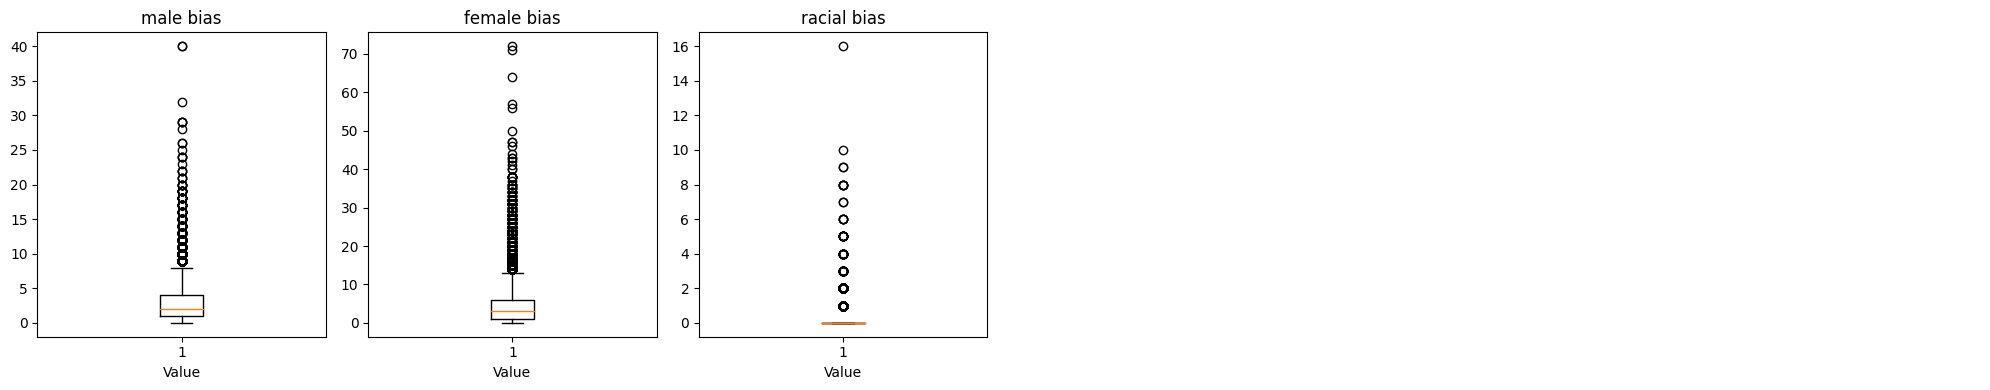

In [ ]:
# select article related columns
article_columns_to_plot= ['male_bias', 'female_bias', 'racial_bias']
# box plot
plot_box_plots(df1_lower, article_columns_to_plot, num_rows=1, num_cols=6)

Plot between Male and Female bias job descriptions in expereince level

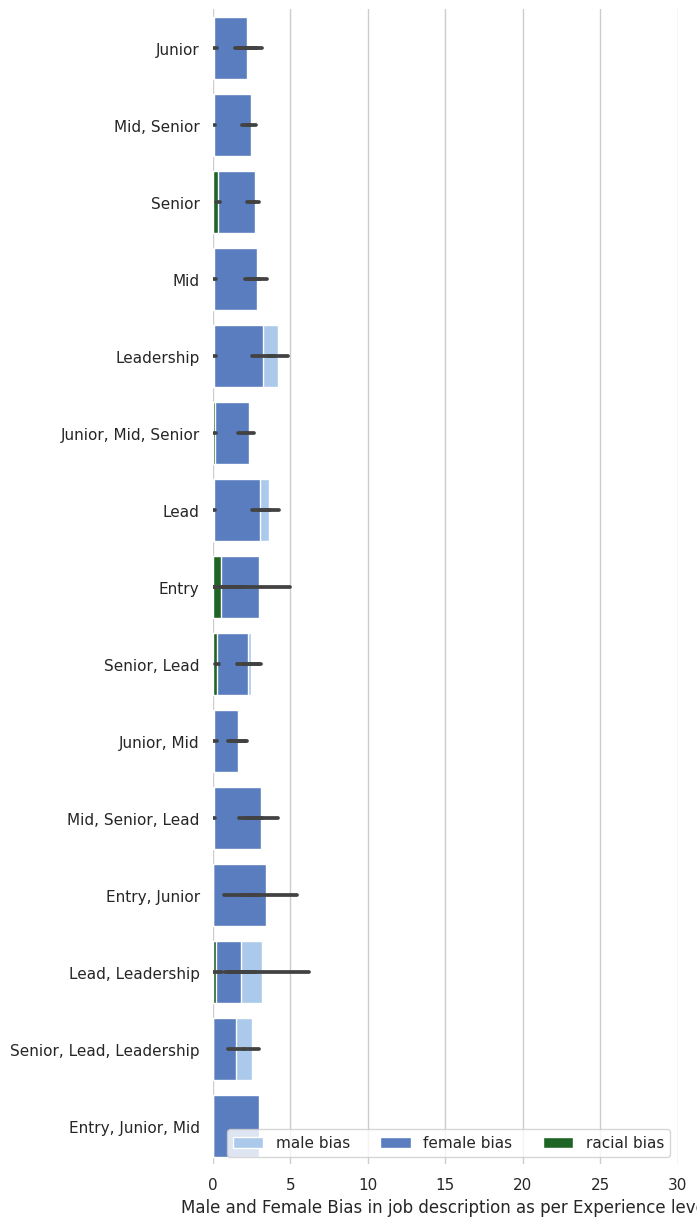

In [ ]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot the male bias keywords
sns.set_color_codes("pastel")
sns.barplot(x="male_bias", y="Experience", data=df1_lower,
            label="male bias", color="b")

# Plot the female bias keywords
sns.set_color_codes("muted")
sns.barplot(x="female_bias", y="Experience", data=df1_lower,
            label="female bias", color="b")

# Plot the racial bias keywords
sns.set_color_codes("dark")
sns.barplot(x="racial_bias", y="Experience", data=df1_lower,
            label="racial bias", color="g")

# Add a legend and informative axis label
ax.legend(ncol=5, loc="lower right", frameon=True)
ax.set(xlim=(0, 30), ylabel="",
       xlabel="Male and Female Bias in job description as per Experience level")
sns.despine(left=True, bottom=True)